**#Exercise 6**

In [53]:
import numpy as np
import math as m
from sklearn import linear_model
import pandas as pd

In [54]:
n=200
delta=np.random.normal(0,m.sqrt(0.05),n)
x1=np.random.uniform(0,10,n)
x2=np.random.uniform(0,10,n)

In [55]:
# 𝑦=𝜃0 +𝜃1𝑥1 +𝜃2𝑥2 +𝜃3𝑥1𝑥2 +𝜂
#𝜃0 =3 
#𝜃1 =2 
#𝜃2 =1
#𝜃3 =1 
y = 3 + 2*x1 + 1*x2 + 1*x1*x2 + delta

In [56]:
df = pd.DataFrame((x1,x2,y))
df=df.T
df.columns=("x1","x2","y")

In [57]:
reg = linear_model.LinearRegression()
reg.fit(df[["x1","x2"]].values,df.y.values)
reg.intercept_,reg.coef_

(-22.788719834228665, array([7.39932312, 5.89836427]))

In [58]:
yest=reg.intercept_+reg.coef_[0]*x1+reg.coef_[1]*x2

In [59]:
sum=0
for i in range(1,n):
    sum=sum+(y[i]-yest[i])**2
sum
MSE=1/200*sum
MSE

61.92301918629956

In [60]:
#𝑦=𝜃0 +𝜃1𝑥1 +𝜃2𝑥2 +𝜃3𝑥1𝑥2 +𝜂
#ytransformed= 3+2*f1+1*f2+1*f3 
x1new=np.random.uniform(0,np.nextafter(10,20),200)
x2new=np.random.uniform(0,np.nextafter(10,20),200)
x3new=x1new*x2new
ynew=3+2*x1new + 1* x2new + 1*x3new

In [61]:
reg2 = linear_model.LinearRegression()
df2=pd.DataFrame((x1new,x2new,x3new,ynew))
df2=df2.T
df2.columns=("x1new","x2new","x3new","ynew")
reg2.fit(df2[["x1new","x2new","x3new"]],df2.ynew)

LinearRegression()

In [62]:
yestnew=reg2.intercept_+reg2.coef_[0]*x1new+reg2.coef_[1]*x2new+reg2.coef_[2]*x3new

In [63]:
sumnew=0
for i in range(1,n):
    sumnew=sumnew+(ynew[i]-yestnew[i])**2

MSEnew=1/200*sumnew
MSEnew

7.057149658107172e-29

Την πρώτη φορά χωρίς το transformation βλέπουμε πως έχουμε αποκλίσεις(Μεγάλο MSE) απο την εκτίμηση με 
τα πραγματικά νούμερα που υπολογίσαμε νωρίτερα ενώ αφού γίνει το transformation οι αποκλίσεις μειώνονται στο ελάχιστο(Πολύ χαμηλότερο MSE)και αυτό γιατί μπορέσαμε να κάνουμε το πρόβλημα γραμμικό και να το αντιπετωπίσουμε(εκτιμήσουμε) αποτελεσματικά.Έτσι οι εκτιμητές μας δίνουν αποτελέσματα τα οποία είναι πολύ κοντά στα πραγματικά δεδομένα του προβλήματος.

**#Exercise 7**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
x=np.random.uniform((-2,-2),(2,2),(2000,2))

In [66]:
A=x[:,1]**2-x[:,0]**2
A1=x[A>0]
A2=x[A<=0]
y1=np.ones(len(A1))
y2=np.ones(len(A2))*-1
y=np.hstack((y1,y2))
onesones=np.ones((len(x),))
xnice=np.vstack((A1,A2))
X=np.column_stack((onesones,xnice))
trx=X.transpose()

(-2.5, 2.5)

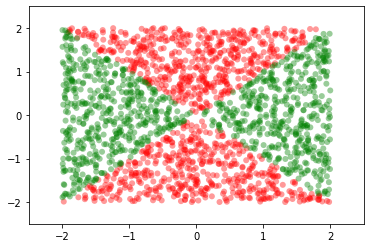

In [67]:
plt.scatter(xnice[:,0],xnice[:,1],color= ['red' if l == 1 else 'green' for l in y],alpha=0.4,lw=0)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

In [68]:
xnew=x**2
Anew=xnew[:,1]**2-xnew[:,0]**2
A1new=xnew[Anew>0]
A2new=xnew[Anew<=0]
y1new=np.ones(len(A1new))
y2new=np.ones(len(A2new))*-1
ynew=np.hstack((y1new,y2new))
xnew1=np.vstack((A1new,A2new))
Xnew=np.column_stack((onesones,xnew1))

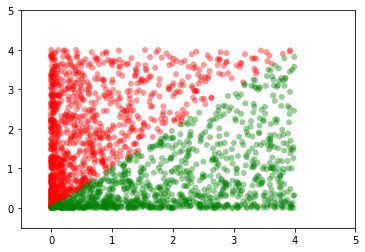

In [69]:
plt.scatter(xnew1[:,0],xnew1[:,1],color= ['red' if l == 1 else 'green' for l in ynew],alpha=0.4,lw=0)
plt.xlim(-0.5,5)
plt.ylim(-0.5,5)
plt.show()

Βλέπουμε πως αρχικά το πρόβλημά μας δεν ήταν διαχωρίσιμο γραμμικά ενώ κάνοντας την μετατροπη(transform) τα στοιχεία είναι πια διαχωρίσιμα γραμμικά.Μετασχηματίσαμε το πρόβλημά μας με αποτέλεσμα να μπορούμε να το διαχωρίσουμε αποτελεσματικά σε κλάσεις.

In [70]:
trxnew=Xnew.transpose()
thetanew=np.dot(np.linalg.inv(np.dot(trxnew,Xnew)),np.dot(trxnew,ynew))
thetanew

array([ 0.04883745, -0.48659161,  0.45700466])

**Exercise 8**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Generate data
mean1 = [0,0]
cov1 = [[10,0],[0,10]]

mean2 = [15,15]
cov2 = [[1,0],[0,1]]

In [73]:
x1 = np.random.multivariate_normal(mean1,cov1,1000)
x2 = np.random.multivariate_normal(mean2,cov2,20)

In [74]:
y1=np.ones(1000)

In [75]:
y2=np.ones(20)
y2=y2*(-1)

In [84]:
y=np.hstack((y1,y2))

In [77]:
xbackup=np.vstack((x1,x2))

In [78]:
b = np.ones((1020,1))

In [83]:
X=np.hstack((b,xbackup))

In [80]:
trx=X.transpose()

In [81]:
theta=np.dot(np.linalg.inv(np.dot(trx,X)),np.dot(trx,y))

equation=theta[0]+theta[1]*xbackup[:,0]+theta[2]*xbackup[:,1]
x2=(-theta[0]-theta[1]*xbackup[:,0])/theta[2]

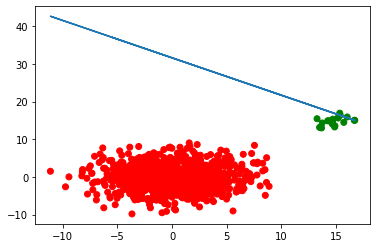

In [82]:
#plot X data
fig = plt.figure()
plt.scatter(xbackup[:,0],xbackup[:,1],c=['red' if l == 1 else 'green' for l in y],marker='o')
plt.plot(xbackup[:,0],x2)

plt.show()

Επειδή έχουμε πάρει 1000 σημεία απο το πρώτο κριτήριο και μόνο 20 απο το δεύτερο και χρησιμοποιώντας το LSE το οποίο βγάζει το ελάχιστο κόστος βλέπουμε πως η γραμμή βελτιστοποιεί αυτό το κριτήριο όμως η γραμμή είναι σαν να αγνοεί την μικρή ομάδα και αυτό γιατί δεν επηρεάζει το κόστος σε μεγάλο βαθμό συγκριτικά με την πρώτη ομάδα.Έτσι μπορεί να έχουμε βρει την γραμμή για το βέλτιστο κόστος,έχουμε όμως χάσει την λύση για το αρχικό classification problem.(Να βρούμε μια γραμμή να χωρίζει τις δυο κλάσσεις.)